# Where's my Happy Ending?

##### Why using Contextual Embeddings :)
<br>
<br>


Table of contents:
- The Idea
- The Problem
- Transformers
- BERT
- Practical Example
- Conclusion
- Trouble Shooting
- References
<br>

# The Idea

*"And they lived happily ever after"..* <br>

The end of a story makes people emotional. The mood of an entire book can be enhanced or even ruined by the ending. It is therefore less risky for authors to offer a happy and/or emotional ending. ...The fact that you feel is the natural consequence to the long story you have read/seen The effect is a personal emotional response that does not involve disappointment. But how long will it take you to read 1000 books to investigate if it's a happy ending or a sad ending? <br>
So let's get some help! <br>
With methods of Natural Language Processing it is possible to catch the sentiment of a story. The *Word Embeddings*-Method gives us the ability to record context mechanically and classify it afterwards in desired labels.
Let's have a look at the last paragraphs of famous stories and test if it's a happy ending or not!

# The Problem

One of the problems in investigating language based research questions is to get a language model to capture not only semantics but context. *Word Embeddings* have several approaches to do so. A fast and easy approach is using static embeddings. But it brings up the problem of polysemic words.
The solution for the polysemy problem is provided by contextualized embeddings.<br>
The contextual embeddings are used to capture different meanings of a word.<br>
<b>Example: “Tom left the bank and played on the river bank”</b> <br>
In the case of static word embeddings, it would assign the same vector to the word “bank” both times. Contextual embedinngs would assign different vectors to each of them, due to the context. 

#### Surface Knowledge or Rabbit Hole?
This topic can get very complex quiet fast. Especially, if you want to understand every detail of this algorythm. But do you really need to understand every layer of this architecture? <br>
-> <b>No, you don't!</b> So in the following you will learn the most needed practical facts about BERT, if you want to understand the process. <br>
For a deeper understanding we recommend to read through the linked references. 

# BERT - In Theory

Let's start from the beginning.

To use this method, you don't need to train a model completely from scratch. There are already pretrained models from several providers available in open source. To train a good model you need a rather big amount of data, which will influence the quality of your model. The more the better. So it is totally common to pick an already pretrained model, which you CAN fine tune for your down-stream task.
This pretrained model will have generic information about the semantic relationship of a language. <br>
In this tutorial we also will use a pretrained model, which is able to generate a semantic word representation already. <br>
But for better results we will optimize it in our final task.<br>
Only, to understand the process, we will go over the <b>theory from scratch</b>.

Indeed, before we come to BERT Architecture, you have to understand where it's rooted: TRANSFORMERS

## Transformers

One of the achievements of Natural Langugage Processing is the Transformer Artchitecture you see in Fig. 1. <br> 
Transformer was created to enable machine translation. In Fig. 2  you see it is composed of an encoder (left block) and a decoder (right block).<br> The <b>*Attention Layer*</b> characterizes this language model and distinguishes it from previous models.

Encoder Block: This is a standard step in NLP applications in which we transform each input word into a vector. The vector then becomes a representation of this word and it can capture both, syntactic and semantic meaning of a word.

Decoder Block: The decoder block, as the name suggests, accepts the encoded results of the encoder block and converts sentences/words out again after the calculation. 

<div>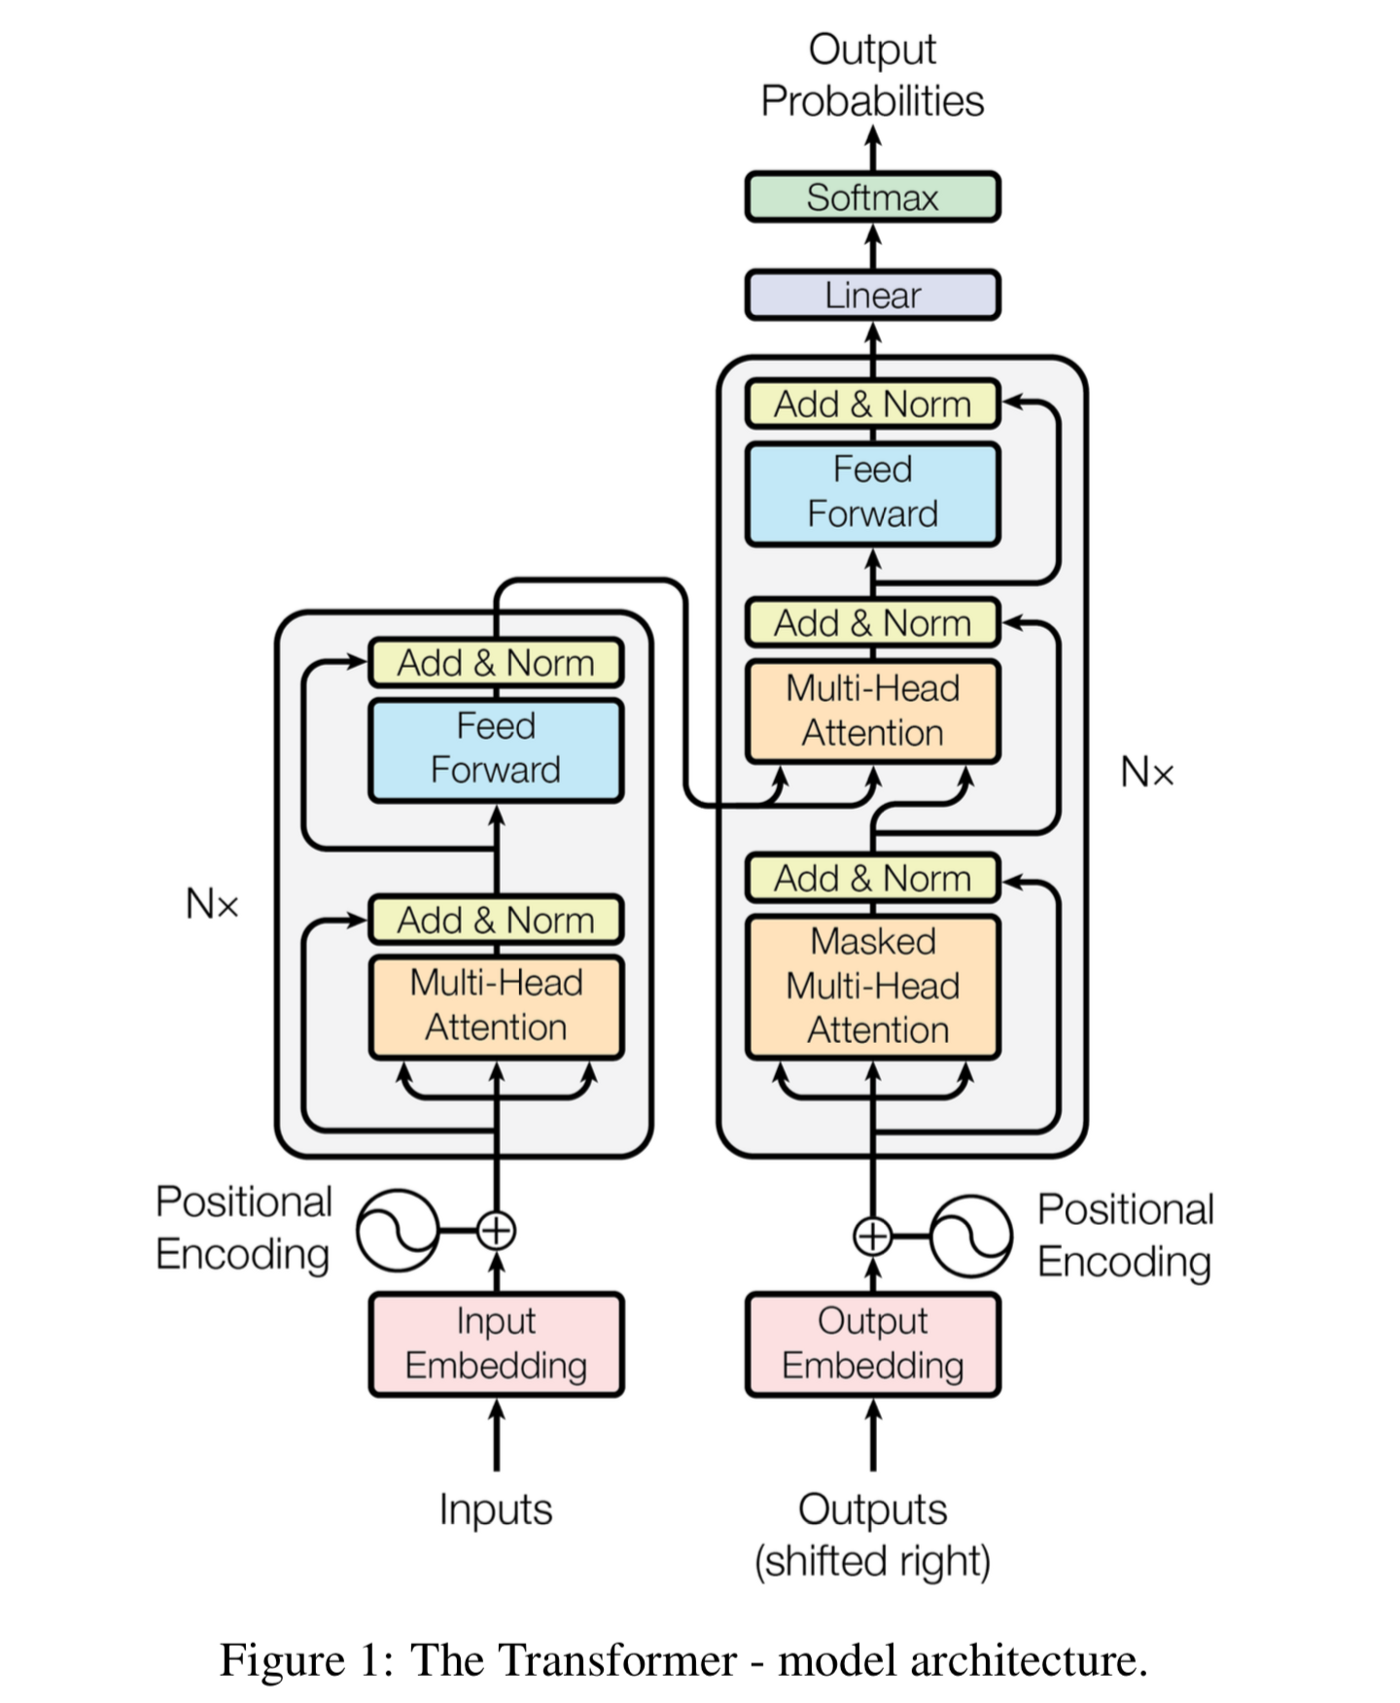Fig.1 [2]<img src="The_transformer_encoder_decoder_stack.png"width=400 height=400 />Fig. 2: Encoder and Decoder Block [3]</div>


## BERT

BERT (Bidirectional Encoder Representations from Transformers) was created from the Transformers architecture. It uses parts of the Transformer, but only the encoder block, as you can see in Fig. 3 and Fig. 4.<br>
Since there are tasks that cannot be solved by a transformer, Bert has a different goal than a transformer. Therefore the decoder block is cut off and the output after the encoder block is adapted to the respective task.
The following tasks are some, that can be performed with BERT: Classification (i.E. Sentiment Analysis), Question Answering, Named Entity Recognition. 

The special feature of BERT is that the tokens are viewed simultaneously from left to right and right to left. That means the context is captured in both directions.
<br>

<img src="bert.jpg" width=300 height=300 />Fig. 3: Cut Off Encoder Block [2]<img src="encoder.jpg" width=300 height=300 />Fig. 4:  Cut Off Decoder Block [3]

#### Pre-Training
##### How to create a language model?
As with static embeddings, the language model must first be trained.
So before we can solve our problems and use the machine to solve them, the machine first has to learn to understand human language. For this process we need two tasks for: <br>
[MASK] = Every sentence gets a word masked and the model trys to predict it. So the model pays attention to the words coming before and after [MASK] and it learns what word fits in with the highest probability. <br>
[Next Sentence Prediction] = The model tries to predict a whole next sentence to learn the relationship between two sentences in a text. 

##### But first things first: Word -> Vector?
Before any Embeddings are computed, the text sequence is getting tokenized. It’s only possible to feed a sequence of a maximum of 512 tokens into an input embedding. <br>
In Fig. 5 you see how an input embedding looks like. It is a sum of the Token, Segment and the Position Embedding. The Token Embedding, which is graphically explained in Fig. 6 is a representation of every token in the form of a vector with 768 Dimensions. The Segment Embedding you see in Fig. 7 is the vector representation of two consecutive sentences. The Positional Embedding ensures, that identical words, that are in different positions have different output vector representations. <br>
Additionally, as you see in Fig. 5,6 and 7, an [CLS] Token is added in the beginning of the sequence. This serves as a representation for the classification task. The [SEP] is a Token separating the consecutive pair of input text. 
Our input is now ready to enter the BERT Architecture and to be put hierarchicall through its layers.  

<img src="input3.png" width=500 height=400 />Fig. 5: Input Token [4]

<img src="input.png" width=600 height=600 />[5]<img src="input_seg.png" width=400 height=400 />[6]

<img src="Token_Embeddings.svg" width=600 height=600 />Fig. 6: Detailed Version of Token Embeddings<img src="Segment_Embeddings.svg" width=600 height=600 />Fig. 7: Detailed Version of Segment Embeddings

#### Fine-Tuning
Now that we understand how the input is generated, let’s look at the fine-tuning. <br>
Fine-tuning a model means you take a pre-trained model trained on a task and "tune and tweak" the model to make it perform another similar task. So it’s about specifying a task you want your model to perform and solve your problem. Depending on the task, different forms of outputs come out. But also different embeddings are computed. For example, if we have a Question Answering Task, we will put a sequence as a question in the final model and get a sequence as the answer out. Due to training it on the QA-Task, it will also influence the computed embedding for a word then it would have had on a NER-Task. <br> 
In the following example we will use the Classification Task “Sentiment Analysis”. So in the end we will put a sequence in and shall get a sentiment out.

<h1> Preprocessing</h1>

<p>These are the libraries you'll need to install. Just remove '#' for if needed. </p>

In [1]:
# !pip install pandas 
# !pip install numpy
# !pip install transformers
# !pip install os
# !pip install glob
# !pip install path
# !pip install pathlib

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import torch
import transformers 

<p> 
    <br>
    <h2> Dataset</h2>
    <br>
    To detect wether it's a happy ending or not, we need to train our model to recognize the sentiment of a sentence. So for fine tuning the generic, pre-trained model, we will use a dataset, which contains text with the assigned sentiment labels already. <br>
    We'll work with an IMDb Dataset from Kaggle. It contains 50k comments and a sentiment each "positive" or "negative". <br>
    You can  <b>download it here</b>: https://www.kaggle.com/code/satyampd/imdb-sentiment-analysis-using-bert-w-huggingface/data
    <br>
    <h3> 1. Step </h3>
    First of all, we load the data and look what we are working with. <br>
    It's recommanded to place the <b>dataset</b> and this <b>notebook</b> in the <b>same folder!</b> Otherwise specify your path to the dataset precisely.
    
</p>    

In [2]:
from datasets import load_dataset
dataset = load_dataset("poem_sentiment")

Using custom data configuration default
Reusing dataset poem_sentiment (C:\Users\vAudience\.cache\huggingface\datasets\poem_sentiment\default\1.0.0\4e44428256d42cdde0be6b3db1baa587195e91847adabf976e4f9454f6a82099)


  0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 892
    })
    validation: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 105
    })
    test: Dataset({
        features: ['id', 'verse_text', 'label'],
        num_rows: 104
    })
})

In [4]:
# zusätzlicher Hilfeschritt, nicht notwensig es in DF zu packen
df_poem_train = pd.DataFrame(dataset["train"])
df_poem_train

,id,verse_text,label
0,0,with pale blue berries. in these peaceful shad...,1
1,1,"it flows so long as falls the rain,",2
2,2,"and that is why, the lonesome day,",0
3,3,"when i peruse the conquered fame of heroes, an...",3
4,4,of inward strife for truth and liberty.,3
...,...,...,...
887,887,to his ears there came a murmur of far seas be...,2
888,888,"the one good man in the world who knows me, --",1
889,889,faint voices lifted shrill with pain,0
890,890,"an', fust you knowed on, back come charles the...",2


In [5]:
df_poem_test = pd.DataFrame(dataset["test"])
df_poem_test

,id,verse_text,label
0,0,"my canoe to make more steady,",2
1,1,and be glad in the summer morning when the kin...,1
2,2,and when they reached the strait symplegades,2
3,3,she sought for flowers,2
4,4,"if they are hungry, paradise",2
...,...,...,...
99,99,shall live my highland mary.,2
100,100,now is past since last we met,2
101,101,begins to live,2
102,102,beneath the hazel bough;,2


In [3]:
#old dataset
#df = pd.read_csv("IMDB_Dataset.csv")
#df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


Here we see how balances is our dataset:

In [4]:
#old dataset
#df["sentiment"].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

To make it machine readable, we need to put digits as labels:

In [5]:
#old dataset
#def cat2num(value):
#    if value=='positive': 
#        return 1
#    else: 
#        return 0
#    
#df['sentiment']  =  df['sentiment'].apply(cat2num)

In [6]:
#df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


Now, to pass our information in a readable form to our BERT library we have to rename the columns, as the library requires:

In [8]:
#old dataset
#df.columns = ["text", "label"] 

For faster processing we take only a random sample of our data splitted into a train and test set for later model training purposes


In [11]:
#small_train_dataset = df.sample(n=100)
#small_test_dataset = df.sample(n=10)

# Pre-training

### Tokenization and Definition of Model
### 2. Step

Now we need to load the pre-trained model and tokenize the reviews, to get out unusefull brackets and punctuation etc. Also to get an embedding vector for every word used in the dataset. <br>
As a model we use *"DistillBert"*, which is smaller but faster to process then BERT itself. Therefore we import the needed model and tokenizer from the library Hugging Face the package "transformers". Also we need the package "datasets", which has data processing methods and evaluation metrics to quickly get the dataset ready for training in a deep learning model.

In [6]:
from datasets import Dataset
from transformers import pipeline
from transformers import InputExample, InputFeatures
from transformers import AutoTokenizer, AutoModelForSequenceClassification

<b>checkpoint</b> is the generic, pretrained model we initialize here:

In [7]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased") 

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.w

<b>tokenizer</b> is also a pretrained tokenizer we use from Hugging Face:

In [8]:
tokenizer= AutoTokenizer.from_pretrained("distilbert-base-uncased", model_max_length=512) 

<b>nlp</b> is the name of our pipeline(), which is a object that abstract most of the complex code from the library, offering a simple API dedicated to several tasks, as here "sentiment analysis". <br>
In the arguments we have to specify the task, model, tokenizer and <br>
padding = pads to the longest sequence in the batch and <br> 
truncation = truncates to a maximum length specified by the max_length argument.

In [9]:
nlp = pipeline("sentiment-analysis", model="distilbert-base-uncased", tokenizer=tokenizer, padding=True, truncation=True, return_all_scores=True) 

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'classifier.bias', 'classifier.w

For later training purposes, we need to split our set into train and test set and transfer it from the data frame type into a Dataset.list() object:


In [10]:
#small_train=Dataset.from_pandas(small_train_dataset)
#small_test=Dataset.from_pandas(small_test_dataset)

In [11]:
#if processes dataset as df
small_train=Dataset.from_pandas(df_poem_train)
small_test=Dataset.from_pandas(df_poem_test)

The preprocess()-function tokenizes our actual input text.<br>
The map()-funktion allows you to speed up processing. It is a batch maping function, which parallelizes the tokenization of all the examples in a batch.

In [13]:
#if process dataset as df
def preprocess_function(examples):
    return tokenizer(examples["verse_text"], truncation=True, padding="max_length")
 
tokenized_train = small_train.map(preprocess_function, batched=True)
tokenized_test = small_test.map(preprocess_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [47]:
#if process dataset as dict
#def preprocess_function(examples):
#    return tokenizer(examples["verse_text"], truncation=True, padding="max_length")
 
#tokenized_train = dataset["train"].map(preprocess_function, batched=True)
#tokenized_test = dataset["train"].map(preprocess_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

## Testing with untrained model

After choosing a model and loading the pipeline we can test some sentences. But remember, it is a pre-trained model which was not trained on our data yet. <br>
BERT/DistilBert is a well-trained modell on a very big text corpus, but the results may be not acurate enough for our task. <br>
So you can add your data to the modell additionally and train it as a whole again. But for a coarse analysis we can check out the outcome.

In [75]:
#if working with dict
#dataset_small_test= dataset["test"].to_pandas()

In [79]:
#b = dataset_small_test["verse_text"].to_list()

In [16]:
b = df_poem_test["verse_text"].to_list()

In [17]:
#4 Label vorhanden [0-3] aber nur 2 angezeigt
preds = nlp(b)
preds

[[{'label': 'LABEL_0', 'score': 0.4815233647823334},
  {'label': 'LABEL_1', 'score': 0.5184766054153442}],
 [{'label': 'LABEL_0', 'score': 0.4850544333457947},
  {'label': 'LABEL_1', 'score': 0.5149455070495605}],
 [{'label': 'LABEL_0', 'score': 0.46755996346473694},
  {'label': 'LABEL_1', 'score': 0.5324400067329407}],
 [{'label': 'LABEL_0', 'score': 0.4829259216785431},
  {'label': 'LABEL_1', 'score': 0.5170741081237793}],
 [{'label': 'LABEL_0', 'score': 0.49224209785461426},
  {'label': 'LABEL_1', 'score': 0.5077579617500305}],
 [{'label': 'LABEL_0', 'score': 0.4878913164138794},
  {'label': 'LABEL_1', 'score': 0.5121086835861206}],
 [{'label': 'LABEL_0', 'score': 0.4886459410190582},
  {'label': 'LABEL_1', 'score': 0.5113540887832642}],
 [{'label': 'LABEL_0', 'score': 0.4863780736923218},
  {'label': 'LABEL_1', 'score': 0.5136219263076782}],
 [{'label': 'LABEL_0', 'score': 0.4797094166278839},
  {'label': 'LABEL_1', 'score': 0.5202905535697937}],
 [{'label': 'LABEL_0', 'score': 0.4

In [25]:
# smaller sample
# df_sample = df_poem_test[:20]

In [26]:
#seq = df_sample["verse_text"].to_list()

In [27]:
#preds = nlp(seq)
#preds

Here we see how succesfull the generic model predicts and classify the first 20 reviews of our dataset. As you notice, the score is mostly arounf 50%. So it's not very sure about wether its prediction is right or not. <br>
By looking at the ground truth label, we see a view mistakes were made, even though the generic model has already very much understanding of human language. <br>
Therefore, to improve our model, it's an option to train the model with your data, additionally.

In [22]:
df_poem_test["prediction"] = [preds["label"] for pred in preds]
df_poem_test["score"] = [preds["score"] for pred in preds]
df_poem_test

TypeError: list indices must be integers or slices, not str

For better comparison of the models, let's look at the quality of this prediction:

In [35]:
from datasets import load_metric


#geht nicht mehr, da nun mehr als 2 labels

metric=load_metric("f1")
metric.add_batch(predictions=[1 if x["label"] == "LABEL_1" else 0 for x in preds], references=df_poem_test["label"][:20])
metric.compute(average = "micro")

{'f1': 0.15}

In [28]:
! pip install -U scikit-learn

ERROR: Could not install packages due to an OSError: [WinError 5] Zugriff verweigert: 'C:\\Users\\vAudience\\anaconda3\\Lib\\site-packages\\sklearn\\~_check_build\\_check_build.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [31]:
from sklearn.metrics import classification_report
print(classification_report(df_poem_test["label"], df_poem_test["prediction"]))

NameError: name 'df_sample' is not defined

In Machine Learning evaluation is common to use and evaluate the *f1* score, which ranges from [0-1]. It shows us the model’s accuracy on a dataset. So here we see a bad *f1* score, which is understandable, because we didn't fine-tuned the model yet.

## Fine Tune - Train own data on pre-trained model

### 3. Step

If you want more accurate results for your dataset you can add your data to an exisiting pre-trained model and train it again.<br>
For linguists, who work with large or special text corpora, it may be useful to put their own data on top of the pre-trained model and train it again. Words and relationships, which are missing in the pre-trained model, will be added and assigned to an embedding.

The next step allows you to combine your own data and the pre-trained model as well as other parameters for the training process:

In [32]:
from transformers import TrainingArguments, Trainer
 
output = "C:\\Users\\vAudience\\Documents\\project\\pretrainedff"
 
training_args = TrainingArguments(
   output_dir=output,
   evaluation_strategy = "epoch",
   #learning_rate=2e-5,
   #per_device_train_batch_size=16,
   #per_device_eval_batch_size=16,
   #num_train_epochs=2,
   #weight_decay=0.01,
   save_strategy="epoch",
   #push_to_hub=True,
)

For the evaluation we need to load some metrics from "datasets"-package:

In [33]:
from datasets import load_metric

metric = load_metric("accuracy")

In [34]:
def compute_metrics(eval_preds):
    metric = load_metric("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

Now we determine all needed parameters for the training:

In [35]:
trainer = Trainer(
   model= model,
   args=training_args,
   train_dataset=tokenized_train,      
   eval_dataset=tokenized_test,        
   compute_metrics=compute_metrics,
)

The train()-function is the executive train function. <br>
As soon as you run it, the training process beginnns. Don't worry, <b> it will take a while!</b><br>
(Jupyter Notebook: Watch out for the filled circle in the right corner. As soon as it's empty, you should get an output):

In [36]:
trainer.train()    #ERROR: IndexError: Target 2 is out of bounds.

The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: id, verse_text.
***** Running training *****
  Num examples = 892
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 336


IndexError: Target 2 is out of bounds.

<b>ATTENTION</b>: after this process your kernal may be overloaded. So if you get an error "IUD alreaddy running", just run the following code and continue with running the tutorial:

In [64]:
import mlflow
mlflow.end_run()

The evaluate()-function shows you the metrics of the succesfull training:

In [32]:
trainer.evaluate()

The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, __index_level_0__.
***** Running Evaluation *****
  Num examples = 10
  Batch size = 8


{'eval_loss': 0.3489187955856323,
 'eval_accuracy': 0.9,
 'eval_f1': 0.888888888888889,
 'eval_runtime': 15.0662,
 'eval_samples_per_second': 0.664,
 'eval_steps_per_second': 0.133,
 'epoch': 3.0}

"eval_f1" shows us the *f1* score we can compare with the previous model. Remember: the closer it gets to 1, the better!<br>
<br>
<br> 
When looking at the evalutaion metrics, let's not forget, we used just a small test sample to speed up the training process. For better results you can use a bigger sample for training and testing.  
<br>
<br>

<b>ATTENTION</b>: Occasionally, with DistillBert in the Hugging Face lib a systemic error happens, that not all needed documents are downloaded. If you get an error, while evaluating or testing, check this: <br>
- in the latest downloaded model folder (propably named here checkpoint-39) two documents may be missing <br>
"tokenizer_config.json": create a .json file with this name and insert following code and put it into the folder of the model: <br>
```
     {
       "do_lower_case": true
     }
``` 
<br>
"vocab.txt": this is a .txt-file for DistillBert you can download here and also put in the checkpoint-39 folder https://huggingface.co/distilbert-base-uncased/tree/main

## Testing with a trained model

Now we can test some example sentences or texts with our trained und fine tuned model. <br>
Therefore let's put some of the most famous final sentences of world literature into the model and test their sentiment:
<br> <br>

The trained model is locally stored on your computer. So just add a clear path to the model folder:

In [ ]:
from pathlib import Path

path = "INSERT_CLEAR_PATH\checkpoint-39\"

We initialize the variable <b>sentiment_model</b>, so we can use the finished pipeline for our model:

In [ ]:
sentiment_model = pipeline("sentiment-analysis", model=path, tokenizer=path)

In <b>final_text</b> we creat a list of the sequences we want to run through our model, which are not included in our training dataset:

In [ ]:
final_text = ["Love is or it ain't. Thin love ain't love at all.", "It's the possibility of having a dream come true that makes life interesting."]

With <b>final_text_set</b> we run the pipeline on our <b>final_text</b>-list

In [ ]:
final_text_set = sentiment_model(final_text)

Now we creat a Dataframe to present the results more clearly:

In [34]:
happy_end = pd.DataFrame(final_text_set)
happy_end["final_text"] = final_text
happy_end

loading configuration file C:\Users\vAudience\Documents\project\own_model\checkpoint-39\config.json
Model config DistilBertConfig {
  "_name_or_path": "C:\\Users\\vAudience\\Documents\\project\\own_model\\checkpoint-39\\",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.13.0",
  "vocab_size": 30522
}

loading configuration file C:\Users\vAudience\Documents\project\own_model\checkpoint-39\config.json
Model config DistilBertConfig {
  "_name_or_path": "C:\\Users\\vAudience\\Documents\\project\\own_model\\chec

[{'label': 'LABEL_0', 'score': 0.6407472491264343},
 {'label': 'LABEL_1', 'score': 0.6163071990013123}]


## Fine-Tuned Pre-Trained Model

In addition to the existing pre-trained models, there are already fine-tuned models that can be used. For example in our case there is already a fine tuned model for our sentiment analysis task.<br>
As you see, we use the same parameters and same procedure as in the previuos models, but with another model name. <br>
Let's initialize it and train on our own data again:

In [35]:
checkpoint_sa = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer_sa= AutoTokenizer.from_pretrained(checkpoint_sa, model_max_length=512)
nlp_sa = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", tokenizer=tokenizer_sa, padding=True, truncation=True)

loading configuration file https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english/resolve/main/config.json from cache at C:\Users\vAudience/.cache\huggingface\transformers\4e60bb8efad3d4b7dc9969bf204947c185166a0a3cf37ddb6f481a876a3777b5.9f8326d0b7697c7fd57366cdde57032f46bc10e37ae81cb7eb564d66d23ec96b
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased-finetuned-sst-2-english",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "finetuning_task": "sst-2",
  "hidden_dim": 3072,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
 

If you get the error "IUD already running" here too, don't forget to run the following code again and continue the tutorial:

In [39]:
#import mlflow
#mlflow.end_run()

After initializing the fine-tuned model, we use the same parameters and code as previously:

In [36]:
from transformers import TrainingArguments, Trainer
 
output = "INSERT_CLEAR_PATH_TO_FOLDER_WHERE_NEW_MODEL_CAN_BE_STORED"
 
training_args = TrainingArguments(
   output_dir=output,
   learning_rate=2e-5,
   per_device_train_batch_size=16,
   per_device_eval_batch_size=16,
   num_train_epochs=2,
   weight_decay=0.01,
   save_strategy="epoch",
   #push_to_hub=True,
)
 
trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=tokenized_train_copy,      
   eval_dataset=tokenized_test_copy,        
   tokenizer=tokenizer,
   compute_metrics=compute_metrics,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [40]:
trainer.train() 

The following columns in the training set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, __index_level_0__.
***** Running training *****
  Num examples = 100
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 14


Step,Training Loss


Saving model checkpoint to C:\Users\vAudience\Documents\project\finetuned_own_model\checkpoint-7
Configuration saved in C:\Users\vAudience\Documents\project\finetuned_own_model\checkpoint-7\config.json
Model weights saved in C:\Users\vAudience\Documents\project\finetuned_own_model\checkpoint-7\pytorch_model.bin
tokenizer config file saved in C:\Users\vAudience\Documents\project\finetuned_own_model\checkpoint-7\tokenizer_config.json
Special tokens file saved in C:\Users\vAudience\Documents\project\finetuned_own_model\checkpoint-7\special_tokens_map.json
Saving model checkpoint to C:\Users\vAudience\Documents\project\finetuned_own_model\checkpoint-14
Configuration saved in C:\Users\vAudience\Documents\project\finetuned_own_model\checkpoint-14\config.json
Model weights saved in C:\Users\vAudience\Documents\project\finetuned_own_model\checkpoint-14\pytorch_model.bin
tokenizer config file saved in C:\Users\vAudience\Documents\project\finetuned_own_model\checkpoint-14\tokenizer_config.json
S

TrainOutput(global_step=14, training_loss=0.19567464079175675, metrics={'train_runtime': 1382.8641, 'train_samples_per_second': 0.145, 'train_steps_per_second': 0.01, 'total_flos': 26493479731200.0, 'train_loss': 0.19567464079175675, 'epoch': 2.0})

In [41]:
trainer.evaluate() 

The following columns in the evaluation set  don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text, __index_level_0__.
***** Running Evaluation *****
  Num examples = 10
  Batch size = 16


{'eval_loss': 0.2822129726409912,
 'eval_accuracy': 0.8,
 'eval_f1': 0.75,
 'eval_runtime': 17.3356,
 'eval_samples_per_second': 0.577,
 'eval_steps_per_second': 0.058,
 'epoch': 2.0}

In [42]:
path = "INSERT_CLEAR_PATH\checkpoint-14\"

sentiment_model_ft = pipeline("sentiment-analysis", model=path, tokenizer=path)

final_text_ft = ["Love is or it ain't. Thin love ain't love at all.", "It's the possibility of having a dream come true that makes life interesting."]
final_text_set_ft = sentiment_model_ft(final_text_ft)
happy_end_ft = pd.DataFrame(final_text_set_ft)
happy_end_ft["final_text"] = final_text_ft
happy_end_ft

loading configuration file C:\Users\vAudience\Documents\project\finetuned_own_model\checkpoint-14\config.json
Model config DistilBertConfig {
  "_name_or_path": "C:\\Users\\vAudience\\Documents\\project\\finetuned_own_model\\checkpoint-14\\",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.13.0",
  "vocab_size": 30522
}

loading configuration file C:\Users\vAudience\Documents\project\finetuned_own_model\checkpoint-14\config.json
Model config DistilBertConfig {
  "_name_or_path": "C:\\Users\\vAudience\\Docum

,label,score,testtext
0,LABEL_0,0.732508,Love is or it ain't. Thin love ain't love at all.
1,LABEL_1,0.657067,It's the possibility of having a dream come tr...


# Conclusion

This Tutorial walks you through the process from <b>text to sentiment</b>. It shows you how to initialize and use a pre-trained model and also how to fine-tune it on a task. <br>
We used 3 different models and compared their efficiancy with the *f1* score. In the end the generic model performed better after trained on own data, than the fine-tuned trained model. By using a bigger sample (about 70%-80% of dataset) it's possible to increase the performance of (any) models.

# Trouble shooting

- Path problems: 
   - if you use Jupyter Notebook: put the notebook and the dataset folder in the same folder, or use a direct path
   - if you use Windows: your path has to be double slashed like this "C:\\\\...\\\\.."
- Problems while training:
   - some BERT-models in the Hugging Face lib have a systemic issue, that not all needed documents are downloaded. So if you got any error while training, make sure to check on the webside the documents list.

# References

[1]Tiwari, S. P. (07.02.2021): IMDB Sentiment Analysis using BERT(w/ Huggingface). https://www.kaggle.com/code/satyampd/imdb-sentiment-analysis-using-bert-w-huggingface/data [Last visited: 01.06.2022]

[2] Vaswani, A; Shazeer, N.; Parmar, N.; Uszkoreit, N.; Jones, L.; Gomez, A. N.; Kaiser, L.; Polosukhin, I. (2017): Attention is all
you need. In Advances in Neural Information Processing Systems, pages 6000–6010.
https://arxiv.org/pdf/1706.03762.pdf [Last visited: 08.07.2022]

[3][4] Allamar, Jay (27.06.2018):The Illustrated Transformer. Github.
https://jalammar.github.io/illustrated-transformer/ [Last visited: 08.07.2022]

[5] Devlin J.; Chang, M.; Lee, K.; Toutanova, K. (2019): BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. In Proceedings of the 2019 Conference of the North American Chapter of the Association for Computational Linguistics: Human Language Technologies, Volume 1 (Long and Short Papers), pages 4171–4186, Minneapolis, Minnesota. Association for Computational Linguistics. https://arxiv.org/pdf/1810.04805.pdf [Last visited: 08.07.2022]